<a id="Introduction"></a> <br>

<h2>Introduction  </h2>






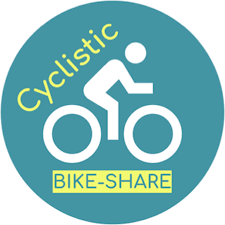  
 
   


This exploratory analysis case study is towards Capstone project requirement for Google Data Analytics Professional Certificate on **Cyclistic** (fictional company), a bike-share program based in Chicago. The program has over 5,800 bikes and 600 dock stations. The company’s marketing director is planning to maximize the number of Cyclistic members by creating marketing strategies to convert casual riders to annual member riders. Casual riders are customers that purchase single-ride or full-day passes. Cyclistic members are customers that purchase annual memberships. 
As a junior data analyst for Cyclistic, I was tasked to make data-driven recommendations for the marketing campaign.
This project will be completed by using the 6 Data Analytics stages:

**Ask**: Identify the business task and determine the key stakeholders.<br>
**Prepare**: Collect the data, identify how it’s organized, determine the credibility of the data.<br>
**Process**: Select the tool for data cleaning, check for errors and document the cleaning process.<br>
**Analyze**: Organize and format the data, aggregate the data so that it’s useful, perform calculations and identify trends and relationships.<br>
**Share**: Use design thinking principles and data-driven storytelling approach, present the findings with effective visualization. Ensure the analysis has answered the business task.<br>
**Act**: Share the final conclusion and the recommendations.<br>
<br>





<h3>Business Objective</h3>
Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics.




<h2> Ask </h2>

**Business Task:**
Recommend marketing strategies aimed at converting casual riders into annual members by better understanding how annual members and casual riders use Cyclistic bikes differently.
    
Questions that guide the future marketing program:
 - How do annual members and casual riders use Cyclistic bikes differently?
 - Why would casual riders buy Cyclistic annual memberships?
 - How can Cyclistic use digital media to influence casual riders to become members?
 
 
 **Deliverable**
 
 A clear statement of the business task
- A description of all data sources used
- Documentation of any cleaning or manipulation of data
- A summary of your analysis
- Supporting visualizations and key findings
- Your top three recommendations based on your analysis
  <br>
  <br>

    
<h2> Prepare </h2>   
    
For this project, I will use the public data of Cyclistic’s historical trip data to analyze and identify trends. The data has been made available by [Motivate International Inc](https://divvy-tripdata.s3.amazonaws.com/index.html). under the [license](https://www.divvybikes.com/data-license-agreement).
and also available on kaggle




In [1]:
# load the required packages

library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(readr)
library(janitor)
library(data.table)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
#load the data set
                   
apr20 <- read.csv("../input/cyclistic/202004-divvy-tripdata/202004-divvy-tripdata.csv")
may20 <- read.csv("../input/cyclistic/202005-divvy-tripdata/202005-divvy-tripdata.csv")
june20 <- read.csv("../input/cyclistic/202006-divvy-tripdata/202006-divvy-tripdata.csv")
july20 <- read.csv("../input/cyclistic/202007-divvy-tripdata/202007-divvy-tripdata.csv")
aug20 <- read.csv("../input/cyclistic/202008-divvy-tripdata/202008-divvy-tripdata.csv")
sep20 <- read.csv("../input/cyclistic/202009-divvy-tripdata/202009-divvy-tripdata.csv")
oct20 <- read.csv("../input/cyclistic/202010-divvy-tripdata/202010-divvy-tripdata.csv")
nov20 <- read.csv("../input/cyclistic/202011-divvy-tripdata/202011-divvy-tripdata.csv")
dec20 <- read.csv("../input/cyclistic/202012-divvy-tripdata/202012-divvy-tripdata.csv")
jan21 <- read.csv("../input/cyclistic/202101-divvy-tripdata/202101-divvy-tripdata.csv")
feb21 <- read.csv("../input/cyclistic/202102-divvy-tripdata/202102-divvy-tripdata.csv")
mar21 <- read.csv("../input/cyclistic/202103-divvy-tripdata/202103-divvy-tripdata.csv")

In [3]:
colnames(apr20)
colnames(may20)
colnames(june20)
colnames(july20)
colnames(aug20)
colnames(sep20)
colnames(oct20)
colnames(nov20)
colnames(dec20)
colnames(jan21)
colnames(feb21)
colnames(mar21)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
## Check data structures and data types for all data frames
str(apr20)
str(may20)
str(june20)
str(july20)
str(aug20)
str(sep20)
str(oct20)
str(nov20)
str(dec20)
str(jan21)
str(feb21)
str(mar21)

'data.frame':	84776 obs. of  13 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" "2020-04-07 12:50:19" ...
 $ ended_at          : chr  "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" "2020-04-07 13:02:31" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : int  86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : int  152 499 255 657 323 35 635 382 359 508 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 ..

<h3> Process </h3>

<h4> Data transformation and cleaning </h4>
start_station_id and end_station_id colummns have inconsistent data type in dec20, jan21, feb21 and mar21 datasets.
They need to be converted from char to int. We will use mutate() function to change the data type of these columns.


In [5]:
#converting the start station id  datatype to integer

dec20$start_station_id <- as.integer(dec20$start_station_id)
jan21$start_station_id <- as.integer(jan21$start_station_id)
feb21$start_station_id <- as.integer(feb21$start_station_id)
mar21$start_station_id <- as.integer(mar21$start_station_id)



#converting the end station id  datatype to integer

dec20$end_station_id <- as.integer(dec20$end_station_id)
jan21$end_station_id <- as.integer(jan21$end_station_id)
feb21$end_station_id <- as.integer(feb21$end_station_id)
mar21$end_station_id <- as.integer(mar21$end_station_id)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [6]:
# verify if the data type has changed
is.integer(dec20$start_station_id)
is.integer(dec20$end_station_id)
is.integer(jan21$start_station_id)
is.integer(jan21$end_station_id)
is.integer(feb21$start_station_id)
is.integer(feb21$end_station_id)
is.integer(mar21$start_station_id)
is.integer(mar21$end_station_id)

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

In [7]:
# merge all 12 months dataset into one

all_trips <- rbind(apr20,may20,june20,july20,aug20,sep20,oct20,nov20,dec20,jan21,feb21,mar21)

str(all_trips)

colnames(all_trips)

glimpse(all_trips)

'data.frame':	3489748 obs. of  13 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : chr  "2020-04-26 17:45:14" "2020-04-17 17:08:54" "2020-04-01 17:54:13" "2020-04-07 12:50:19" ...
 $ ended_at          : chr  "2020-04-26 18:12:03" "2020-04-17 17:17:03" "2020-04-01 18:08:36" "2020-04-07 13:02:31" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : int  86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : int  152 499 255 657 323 35 635 382 359 508 ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.6 -87.7 -87.6 

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

Rows: 3,489,748
Columns: 13
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <chr> "2020-04-26 17:45:14", "2020-04-17 17:08:54", "2020…
$ ended_at           <chr> "2020-04-26 18:12:03", "2020-04-17 17:17:03", "2020…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <int> 86, 503, 142, 216, 125, 173, 35, 434, 627, 377, 508…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <int> 152, 499, 255, 657, 323, 35, 635, 382, 359, 508, 37…
$ start_lat          <dbl> 41.8964, 41.9244, 41.8945, 41.9030, 41.8902, 41.896…
$ start_lng          <dbl> -87.6610, -87.7154, -87.6179, -87.6975, -87.6262, -…
$ end_lat            <dbl> 41.9322, 41.9306, 41.8679, 41.8992, 41.9695, 41.892…
$ end_lng            <dbl> -87.6586, -87.7238, -87.6230, -87.6722, -87.6547, -…
$ member_cas

<h4>Creating a new dataset</h4> <br>

  **excluding the start_lat, end_lng,end_lat,end_lng and creating the version 2 of all_trips**

In [8]:
all_trips_v2 <- all_trips %>%
  select(-(start_lat:end_lng))


In [9]:
glimpse(all_trips_v2)

Rows: 3,489,748
Columns: 9
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <chr> "2020-04-26 17:45:14", "2020-04-17 17:08:54", "2020…
$ ended_at           <chr> "2020-04-26 18:12:03", "2020-04-17 17:17:03", "2020…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <int> 86, 503, 142, 216, 125, 173, 35, 434, 627, 377, 508…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <int> 152, 499, 255, 657, 323, 35, 635, 382, 359, 508, 37…
$ member_casual      <chr> "member", "member", "member", "member", "casual", "…


In [10]:

# Converting character format into Date & Time format 
all_trips_v2 <- mutate(all_trips_v2, started_at = ymd_hms(started_at), ended_at = ymd_hms(ended_at))

In [11]:
str(all_trips_v2)

'data.frame':	3489748 obs. of  9 variables:
 $ ride_id           : chr  "A847FADBBC638E45" "5405B80E996FF60D" "5DD24A79A4E006F4" "2A59BBDF5CDBA725" ...
 $ rideable_type     : chr  "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct, format: "2020-04-26 17:45:14" "2020-04-17 17:08:54" ...
 $ ended_at          : POSIXct, format: "2020-04-26 18:12:03" "2020-04-17 17:17:03" ...
 $ start_station_name: chr  "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ start_station_id  : int  86 503 142 216 125 173 35 434 627 377 ...
 $ end_station_name  : chr  "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ end_station_id    : int  152 499 255 657 323 35 635 382 359 508 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...


<h4>Adding Add new columns to data frame </h4>

In [12]:
#Adding day_of_week column
all_trips_v2 <- all_trips_v2 %>%
mutate(day_of_week = weekdays(started_at))


#column for month when the trip started
all_trips_v2$month <- format(as.Date(all_trips_v2$started_at),'%b_%y')

#column for trip duration in min
all_trips_v2$trip_duration <- (difftime(all_trips_v2$ended_at,all_trips_v2$started_at,units= c('mins')))

In [13]:
glimpse(all_trips_v2)

str(all_trips_v2)

Rows: 3,489,748
Columns: 12
$ ride_id            <chr> "A847FADBBC638E45", "5405B80E996FF60D", "5DD24A79A4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-04-26 17:45:14, 2020-04-17 17:08:54, 2020-04-…
$ ended_at           <dttm> 2020-04-26 18:12:03, 2020-04-17 17:17:03, 2020-04-…
$ start_station_name <chr> "Eckhart Park", "Drake Ave & Fullerton Ave", "McClu…
$ start_station_id   <int> 86, 503, 142, 216, 125, 173, 35, 434, 627, 377, 508…
$ end_station_name   <chr> "Lincoln Ave & Diversey Pkwy", "Kosciuszko Park", "…
$ end_station_id     <int> 152, 499, 255, 657, 323, 35, 635, 382, 359, 508, 37…
$ member_casual      <chr> "member", "member", "member", "member", "casual", "…
$ day_of_week        <chr> "Sunday", "Friday", "Wednesday", "Tuesday", "Saturd…
$ month              <chr> "Apr_20", "Apr_20", "Apr_20", "Apr_20", "Apr_20", "…
$ trip_duration      <drtn> 26.816667 mins, 8.150000 mins, 14.383333 mins, 12.…
'data.frame'

In [14]:
#checking for testrides that were made by company for quality checks
unique(all_trips_v2$start_station_name[grep("test",all_trips_v2$start_station_name) ])
unique(all_trips_v2$start_station_name[grep("TEST", all_trips_v2$start_station_name)])

[1] "hubbard_test_lws"

[1] "HUBBARD ST BIKE CHECKING (LBS-WH-TEST)"
[2] "WATSON TESTING - DIVVY"

In [15]:
all_trips_v2 <- (filter(all_trips_v2, !(start_station_name == "WATSON TESTING - DIVVY" | start_station_name == "HUBBARD ST BIKE CHECKING (LBS-WH-TEST)" | start_station_name =="hubbard_test_lws" | start_station_name =="")))

In [16]:
#verifying
unique(all_trips_v2$start_station_name[grep("test",all_trips_v2$start_station_name) ])
unique(all_trips_v2$start_station_name[grep("TEST", all_trips_v2$start_station_name)])

character(0)

character(0)

In [17]:
# View the minimum and Maximum trip duration

min(all_trips_v2$trip_duration)
max(all_trips_v2$trip_duration)

Time difference of -29049.97 mins

Time difference of 58720.03 mins

In [18]:
head(all_trips_v2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_of_week,month,trip_duration
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<drtn>
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member,Sunday,Apr_20,26.81667 mins
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member,Friday,Apr_20,8.15000 mins
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member,Wednesday,Apr_20,14.38333 mins
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,member,Tuesday,Apr_20,12.20000 mins
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,casual,Saturday,Apr_20,52.91667 mins
6,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member,Thursday,Apr_20,5.40000 mins


In [19]:
# check the number of rows with negative trip duration
nrow(subset(all_trips_v2,trip_duration<0))

[1] 10490

In [20]:
#Create a new data frame without records that have ride length <= zero 

all_trips_v3 <- all_trips_v2[!(all_trips_v2$trip_duration < 0),]

In [21]:
#verification
nrow(subset(all_trips_v3,trip_duration<0))

[1] 0

<h3> Analyse </h3> 

The dataframe is now ready for descriptive analysis that will help us uncover some insights on how the casual riders and members use Cyclistic rideshare differently.

First, let's try to get some simple statistics on trip_duration for all customers, and do the same by customer_type.

In [22]:
# statictical summary of trip_duration for all trips
summary(all_trips_v3$trip_duration)

  Length    Class     Mode 
 3353716 difftime  numeric 

In [23]:
#Min, Max, Median, Mean values for trip_duration
all_trips_v3 %>%
 group_by(member_casual) %>%
    summarise(min_trip_duration = min(trip_duration), max_trip_duration = max(trip_duration), median_trip_duration = median(trip_duration), mean_trip_duration = mean(trip_duration))

member_casual,min_trip_duration,max_trip_duration,median_trip_duration,mean_trip_duration
<chr>,<drtn>,<drtn>,<drtn>,<drtn>
casual,0 mins,55683.88 mins,21.61667 mins,45.93061 mins
member,0 mins,58720.03 mins,11.58333 mins,16.23343 mins


The mean trip duration of member riders is lower than the mean trip duration of all trips, while it is exactly the opposite for casual riders, whose mean trip duration is higher than the the mean trip duration of all trips. This tells us that casual riders usually take the bikes out for a longer duration compared to members.

**Total number of trips by customer type and day of the week**

In [24]:
# fix the order for the day_of_week and month variable so that they show up 
# in the same sequence in output tables and visualizations
all_trips_v3$day_of_week <- ordered(all_trips_v3$day_of_week, levels=c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))


all_trips_v3$month <- ordered(all_trips_v3$month, levels=c('Apr_20', "May_20", "Jun_20", "Jul_20", "Aug_20", "Sep_20", "Oct_20",
                                                          "Nov_20", "Dec_20", "Jan_21", "Feb_21", "Mar_21"))

In [25]:
all_trips_v3 %>% 
  group_by(member_casual, day_of_week) %>%  
  summarise(number_of_rides = n(),average_duration_mins = mean(trip_duration)) %>% 
  arrange(member_casual, desc(number_of_rides))

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,day_of_week,number_of_rides,average_duration_mins
<chr>,<ord>,<int>,<drtn>
casual,Saturday,325675,47.69920 mins
casual,Sunday,254900,51.58985 mins
casual,Friday,200853,43.76945 mins
casual,Thursday,159789,44.04476 mins
casual,Wednesday,151817,41.33808 mins
casual,Monday,145122,46.12465 mins
casual,Tuesday,139222,41.52004 mins
member,Saturday,311003,17.93719 mins
member,Friday,295075,15.91835 mins


<h3>Share </h3>

**Visualization**

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



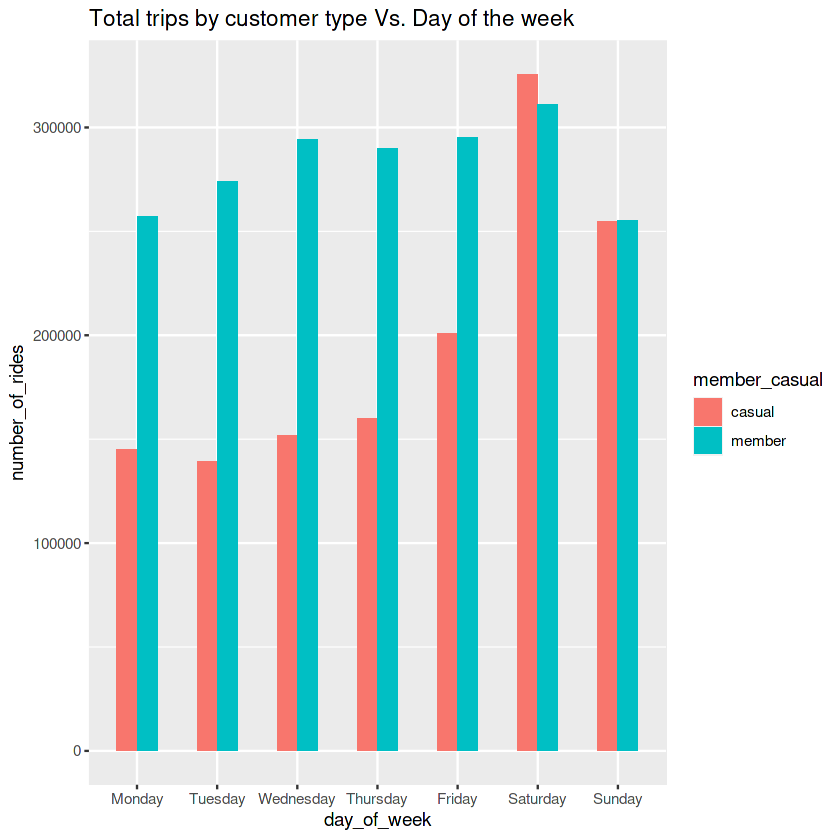

In [26]:
all_trips_v3 %>%  
  group_by(member_casual, day_of_week) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, day_of_week)  %>% 
  ggplot(aes(x = day_of_week, y = number_of_rides, fill = member_casual)) +
  labs(title ="Total trips by customer type Vs. Day of the week") +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

From the above chart, casual customers are most busy on Sundays and Saturdays, where as members are most busy on later half of the week extending into the weekend. Interesting pattern to note though is the consistent trip numbers among members with less spread over entire week as compared to casual riders who don't seem to use the bikeshare services much during weekdays.

**Average number of trips by customer type and month**

In [27]:
all_trips_v3 %>% 
  group_by(member_casual, month) %>%  
  summarise(number_of_rides = n(),`average_duration_(mins)` = mean(trip_duration)) %>% 
  arrange(member_casual,desc(number_of_rides))

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



member_casual,month,number_of_rides,average_duration_(mins)
<chr>,<ord>,<int>,<drtn>
casual,Aug_20,283911,45.37210 mins
casual,Jul_20,268467,59.99361 mins
casual,Sep_20,220730,38.93764 mins
casual,Jun_20,154401,51.71658 mins
casual,Oct_20,130580,31.59943 mins
casual,May_20,86786,51.25173 mins
casual,Mar_21,78867,39.36657 mins
casual,Nov_20,78455,33.44921 mins
casual,Dec_20,26449,28.32454 mins


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



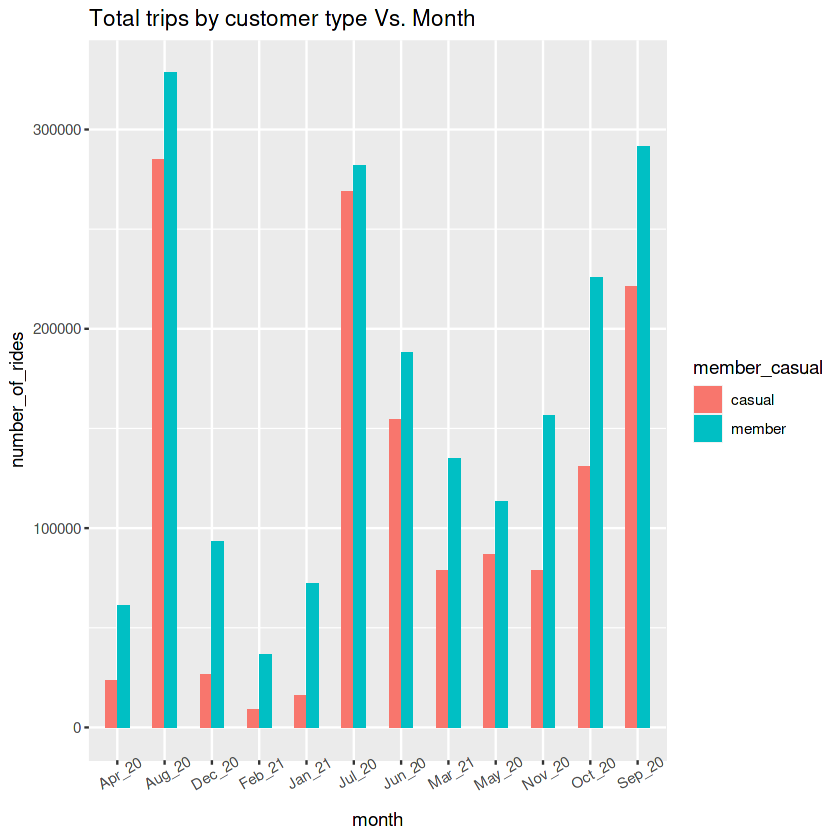

In [28]:
#total trips-by customer type  vs month

all_trips_v2 %>%  
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  labs(title ="Total trips by customer type Vs. Month") +
  theme(axis.text.x = element_text(angle = 30)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE))

The data shows that the months of July, August and September are the most busy time of the year among both members and casual riders.. This could be attributed to an external factor (eg. cold weather, major quality issue) that might have hindered with customer needs. However, the number of trips made by members is always higher than the casual riders across all months of the year.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



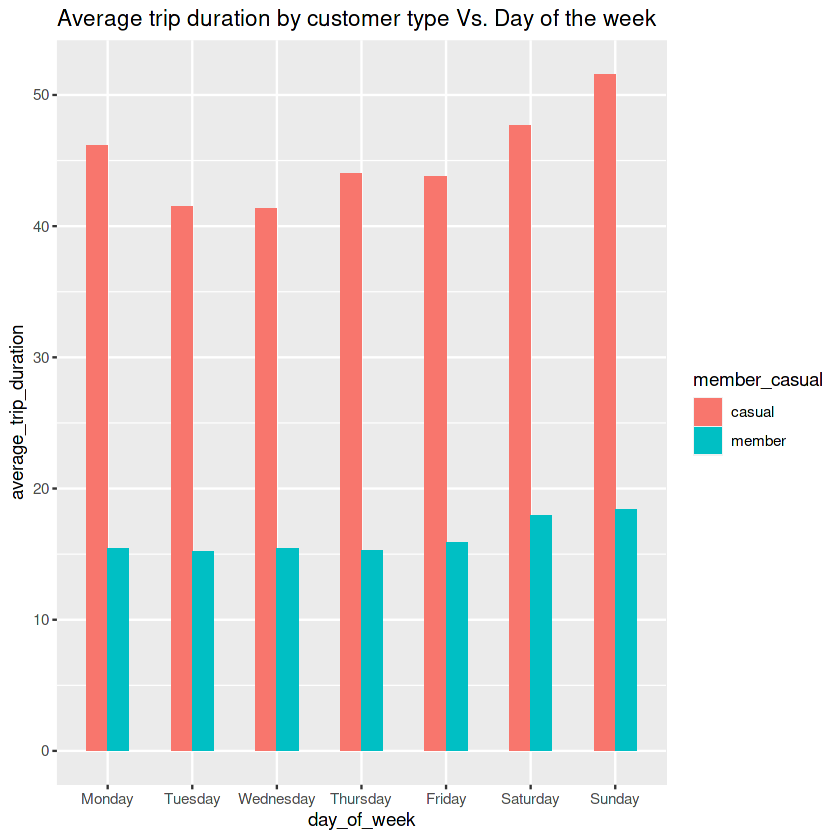

In [29]:
#Visualizaton of average trip duration by customer type on each day of the week

all_trips_v3 %>%  
  group_by(member_casual, day_of_week) %>% 
  summarise(average_trip_duration = mean(trip_duration)) %>%
  ggplot(aes(x = day_of_week, y = average_trip_duration, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  labs(title ="Average trip duration by customer type Vs. Day of the week")

-The average trip duration of a casual rider is more than that of a member.
It is also interesting to note that weekends not only contribute to more number of trips by casual riders but also the average trip duration.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



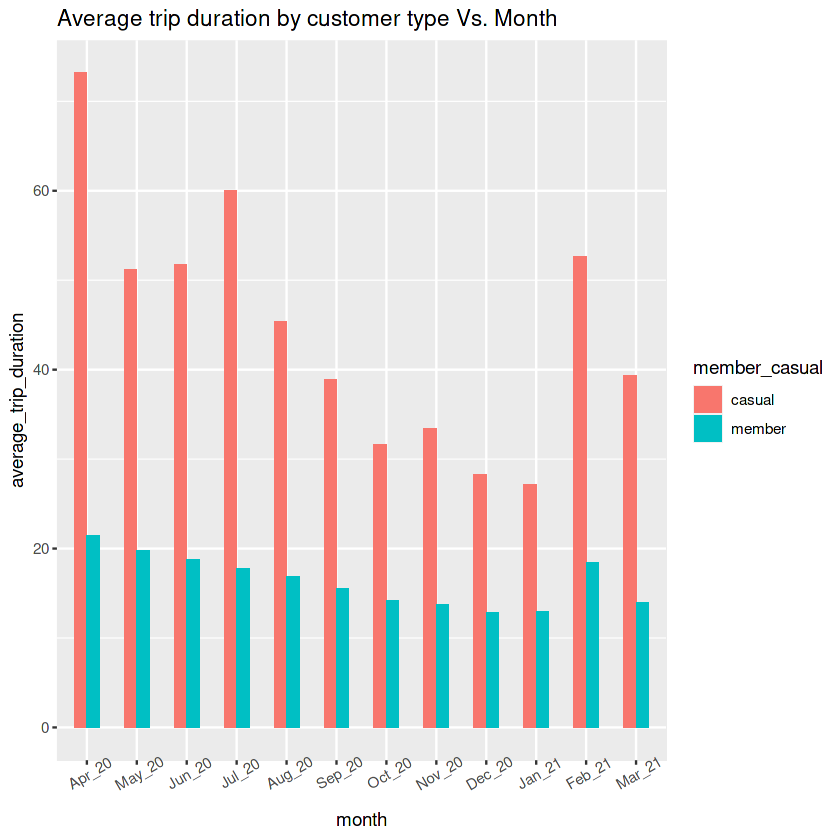

In [30]:
#Visualizaton of average trip duration by customer type Vs. month

all_trips_v3 %>%  
  group_by(member_casual, month) %>% 
  summarise(average_trip_duration = mean(trip_duration)) %>%
  ggplot(aes(x = month, y = average_trip_duration, fill = member_casual)) +
  geom_col(width=0.5, position = position_dodge(width=0.5)) + 
  labs(title ="Average trip duration by customer type Vs. Month") +
  theme(axis.text.x = element_text(angle = 30))

Average trip duration of member riders is anywhere between 10-20 minutes throughout the year, exception being April when it goes slightly over 20 minutes. However, there seems to be a distinct pattern when it comes to casual riders, whose average trip duration swings wildly from as low as ~25 minutes to more than an hour depending on time of the year. It is worth noting unusually long trip durations by casual riders in the month of April.

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



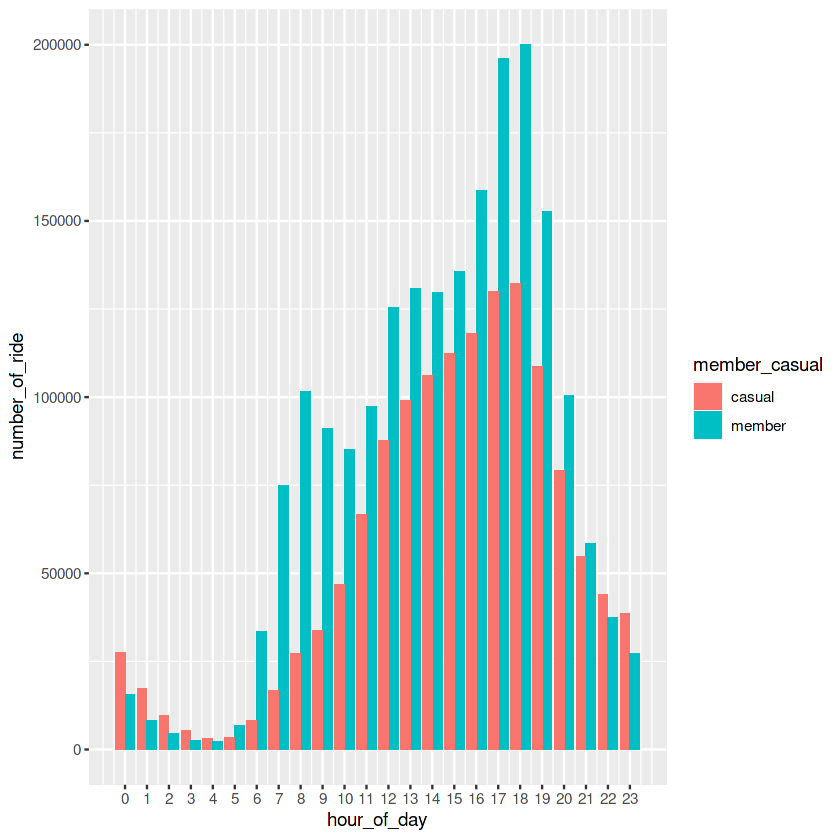

In [31]:
#Visualize casual rider's number of ride for each hour of the day 
all_trips_v3 %>%
    mutate(hour_of_day = hour(round_date(started_at, unit ="hour"))) %>%
   
    group_by(member_casual, hour_of_day) %>%
    summarise(number_of_ride = n()) %>%
    arrange(-number_of_ride) %>%
    ggplot(aes(x = hour_of_day, y = number_of_ride, fill = member_casual)) +
    geom_bar(position = 'dodge', stat = 'identity') +
    scale_x_continuous(breaks=c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23))



For the members, there seems to be two distict peak demand hours: 7-9 AM and 5-7 PM, the latter one coinciding with the peak demand hours of casual riders as well. One could probably hypothesize that office-goers make up majority of the members profile due to demand in both morning and evening hours.

`summarise()` has grouped output by 'rideable_type'. You can override using the `.groups` argument.



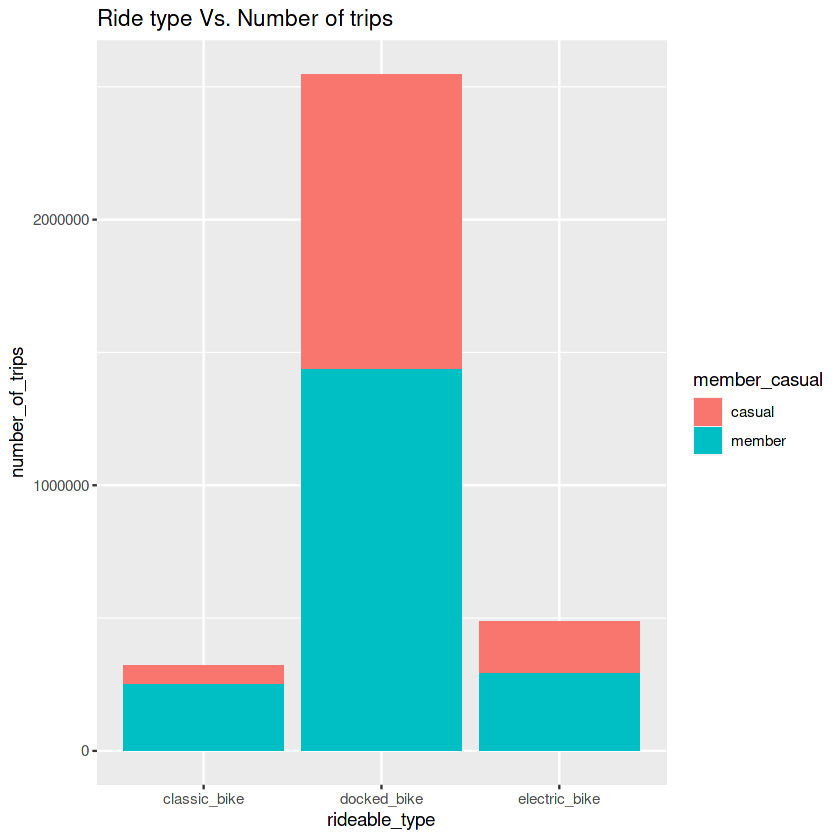

In [32]:
#Visualizaton of ride type Vs. number of trips by customer type

all_trips_v3 %>%
  group_by(rideable_type, member_casual) %>%
  summarise(number_of_trips = n()) %>%  
  ggplot(aes(x= rideable_type, y=number_of_trips, fill= member_casual))+
              geom_bar(stat='identity') +
  scale_y_continuous(labels = function(x) format(x, scientific = FALSE)) +
  labs(title ="Ride type Vs. Number of trips")

In [33]:
#Top 20 start stations for casual riders.

all_trips_v3 %>%
    group_by(start_station_name, member_casual) %>%
    summarise(number_of_ride = n(), .groups = 'drop') %>%
    filter(start_station_name != "", member_casual != 'member') %>%
    arrange(-number_of_ride) %>%
    head(n=20) %>%
    select(-member_casual)

start_station_name,number_of_ride
<chr>,<int>
Streeter Dr & Grand Ave,26189
Lake Shore Dr & Monroe St,20687
Millennium Park,19517
Theater on the Lake,14992
Michigan Ave & Oak St,13693
Indiana Ave & Roosevelt Rd,13692
Lake Shore Dr & North Blvd,13340
Clark St & Elm St,12032
Michigan Ave & Lake St,11794


<h3>Act</h3>

<h4> Key Takeaways </h4>

- Usuage of bikes based on trip duration by casual riders are almost twice than memeber riders.<br>
- Casual riders use bike services more during weekends where as member riders use them consistenly over the week.<br>
- Average trip duration of casual riders are more than twice that of member riders in any given day of the week.<br>
- Casual riders prefer docked bikes the most while classic bikes are popular among members.<br>



<h4>Conclusions</h4>

- Members use the bikes more frequently, for shorter durations, and relatively consistently throughout the year. They tend to use the bikes within the city/away from the waterfront compared to casual users.<br>
- Casual riders use the bikes less frequently but for longer durations, primarily in warmer weather months. They tend to use the bikes along the waterfront rather than within the city.<br>

<h4>Recommendations </h4>

- Provide attractive promotions and discouts on bike fares for casual riders on weekdays so that casual members use the bikeshare services ore uniformly across the entire week.<br>
- Run a limited discount program on annual membership during peek months from July - September.<br>
- Target the top 20 stations with the most casual riders with discounted membership offers.</br>
- Have physical copies of posters or ads available with membership promotion details at the docking stations. Target to play any digital ads during the peak bike demand hours.</br>

**Additional recommendations**

- Provide a weekend discount program that gives casual riders x% off on their next ride if they ride over 30 minutes.<br>
- Run a Referaal program where membership riders will be getting a compensation of a certain for referring to casual rider where casual riders gets a x% discount on annual package.
- Membership riders will be getting insurance upto 100% where as casual riders will be getting upto 30% incase any accidents  